In [1]:
import numpy as np
import matplotlib.pyplot as plt

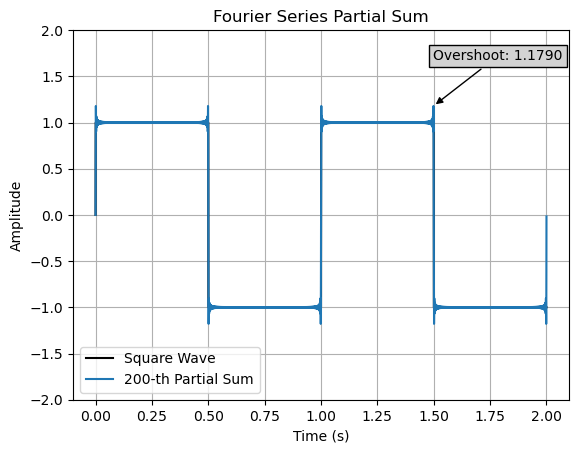

In [61]:
amplitude = 1.0
frequency = 1.0
duration = 2.0
sampling_rate = 100000
n = 200

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
square_wave = amplitude * np.sign(np.sin(2 * np.pi * frequency * t))

partial_sum = np.zeros_like(t)
for k in range(1, n+1):
    partial_sum += (4 / (np.pi * (2*k-1))) * np.sin((2 * np.pi * (2*k-1) * frequency * t))

plt.plot(t, square_wave, label='Square Wave', color='black')
plt.plot(t, partial_sum, label=f'{n}-th Partial Sum')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Fourier Series Partial Sum')
plt.ylim(-2, 2)
plt.legend(loc='lower left')
plt.grid(True)

# Find the maximum overshoot point and add a label
overshoot_index = np.argmax(partial_sum)  # Find the index of the maximum overshoot
overshoot_time = t[overshoot_index]  # Get the corresponding time value
overshoot_amplitude = partial_sum[overshoot_index]  # Get the overshoot amplitude
plt.annotate(f'Overshoot: {overshoot_amplitude:.4f}',
             xy=(overshoot_time, overshoot_amplitude),
             xytext=(overshoot_time, overshoot_amplitude + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'),
             bbox=dict(boxstyle='square', facecolor='lightgray'))
plt.show()


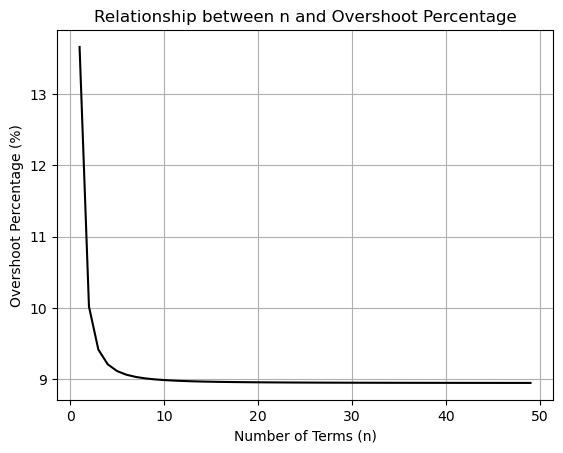

In [57]:
n_values = np.arange(1, 50)  # Specify the range of n values to consider
overshoot_values = []

for n in n_values:
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    partial_sum = np.zeros_like(t)
    for k in range(1, n+1):
        partial_sum += (4 / (np.pi * (2*k-1))) * np.sin((2 * np.pi * (2*k-1) * frequency * t))
    overshoot = (np.max(partial_sum) - amplitude) * 50.0  # Calculate the overshoot
    overshoot_values.append(overshoot)

plt.plot(n_values, overshoot_values, color='black')
plt.xlabel('Number of Terms (n)')
plt.ylabel('Overshoot Percentage (%)')
plt.title('Relationship between n and Overshoot Percentage')
plt.grid(True)
plt.show()